In [80]:
import os
import json
import matplotlib.pyplot as plt

os.system('mkdir out')
os.system('mkdir exe')

list_cores = (1, 2, 4, 6)

In [81]:
# Clear out/ and exe/
os.system('rm out/*')
os.system('rm exe/*')

rm: cannot remove 'out/*': No such file or directory
rm: cannot remove 'exe/*': No such file or directory


256

## Задание 1

In [82]:
# Compile
os.system('mpicc -o exe/task1.exe src/task1.c')

0

In [83]:
# Experiments
for n in list_cores:
    os.system(f'mpiexec -n {n} ./exe/task1.exe')

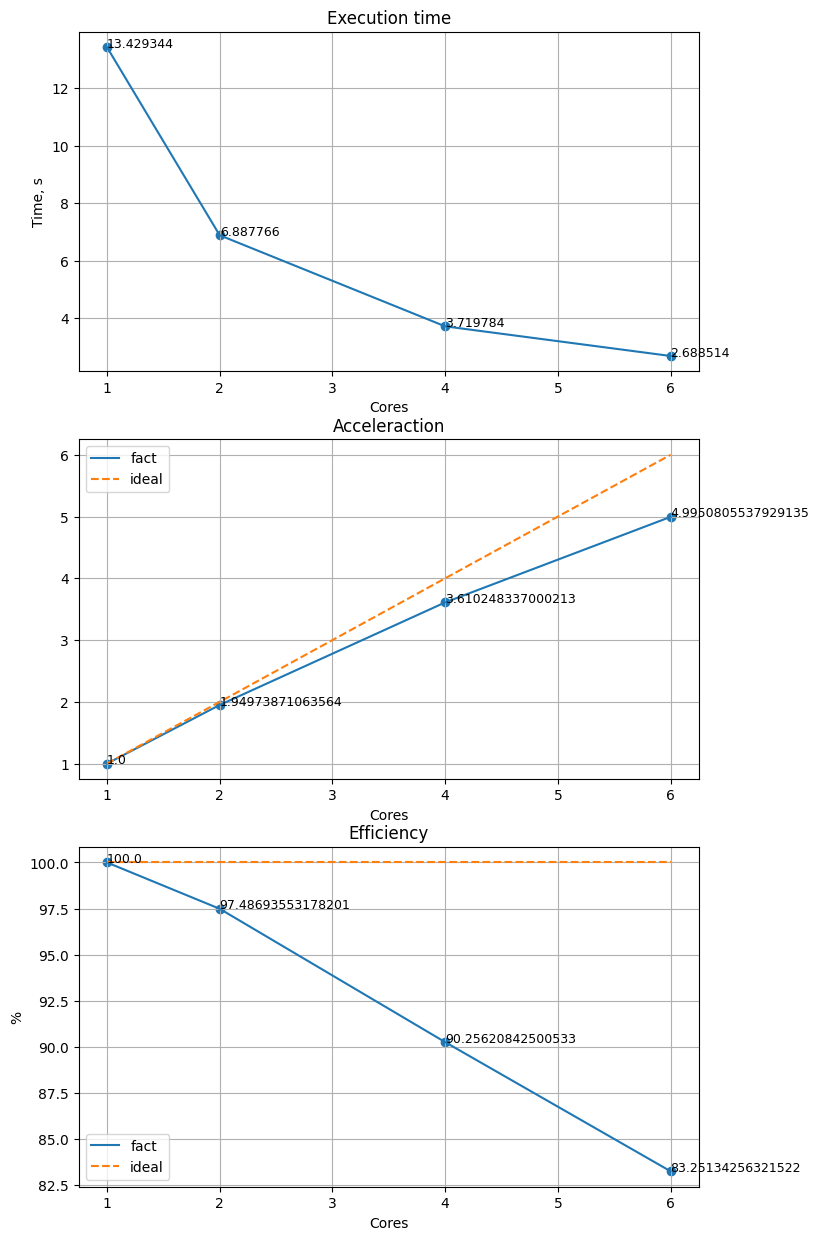

In [84]:
# Graphs
experiments = []
for n in list_cores:
    with open(f'out/task1_{n}.json') as f:
        experiments.append(json.load(f))

plt.figure(figsize=(8, 15))


exec_time_y = [x['exec_time'] for x in experiments]
plt.subplot(3, 1, 1)
plt.plot(list_cores, exec_time_y)
plt.title('Execution time')
plt.xlabel('Cores')
plt.ylabel('Time, s')
plt.grid(True)
plt.subplot(3, 1, 1)
plt.scatter(list_cores, exec_time_y)
for x_coord, y_coord, label in zip(list_cores, exec_time_y, exec_time_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  


acceleration_y = [experiments[0]['exec_time'] / x['exec_time'] for x in experiments]
plt.subplot(3, 1, 2)
plt.plot(list_cores, acceleration_y)
plt.plot([1,6], [1,6], linestyle='--')
plt.title('Acceleraction')
plt.xlabel('Cores')
plt.grid(True)
plt.legend(('fact','ideal'))
plt.subplot(3, 1, 2)
plt.scatter(list_cores, acceleration_y)
for x_coord, y_coord, label in zip(list_cores, acceleration_y, acceleration_y):
    plt.text(x_coord, y_coord, label, fontsize=9)


efficiency_y = [(experiments[0]['exec_time'] / x['exec_time']) / y * 100 for x, y in zip(experiments, list_cores)]
plt.subplot(3, 1, 3)
plt.title('Efficiency')
plt.xlabel('Cores')
plt.ylabel('%')
plt.grid(True)
plt.plot(list_cores, efficiency_y)
plt.plot([1,6], [100,100], linestyle='--')
plt.legend(('fact','ideal'))
plt.scatter(list_cores, efficiency_y)
for x_coord, y_coord, label in zip(list_cores, efficiency_y, efficiency_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  

plt.show()

